# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [116]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [117]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [ ]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

In [139]:
data
df = pd.DataFrame(data)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [140]:
X = df.drop(columns='MEDV') #data.iloc[:, :-1] 
y = df['MEDV']#data.iloc[:, -1]

In [141]:
# Your code here :
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [ ]:
# Your code here :
# from sklearn import linear_model
from sklearn.linear_model import LinearRegression


# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# generate predictions for both training and testing sets
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

print(f'Predictions for train {y_train_pred}')
print(f'Predictions for test {y_test_pred}')

In [161]:
# import matplotlib.pyplot as plt

In [160]:

# plt.plot(X_train[:1], y_train[:1], "o", alpha=0.5, label="train")
# plt.plot(X_test[:1], y_test[:1], "o", alpha=0.5, label="test")

# plt.plot(X_train[:1], y_train_pred[:1], "r")



## 3. Calculate and print R-squared for both the training and the testing set.

In [ ]:
# Your code here :
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'r squared score for train {train_r2}')
print(f'r squared score for test {test_r2}')

## 4. Calculate and print mean squared error for both the training and the testing set.

In [ ]:
# Your code here :
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_test_pred, y_test)

print(f'mse for train {train_mse}')
print(f'mse for test {test_mse}')

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [ ]:
# Your code here :

train_mae = mean_absolute_error(y_train_pred, y_train)
test_mae = mean_absolute_error(y_test_pred, y_test)

print(f'mae for train {train_mae}')
print(f'mae for test {test_mae}')

## Classification Model Evaluation

In [165]:
from sklearn.datasets import load_iris
data = load_iris()

In [ ]:
print(data.DESCR)

In [ ]:
column_names = data.feature_names
column_names

In [168]:
df = pd.DataFrame(data['data'],columns=column_names)

In [ ]:
df

In [ ]:
target = pd.DataFrame(data.target)
target

In [ ]:
data.keys()

In [200]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [180]:
# Your code here :
lr_X = df.copy()
lr_y = target.copy()

lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(lr_X, lr_y, test_size= 0.2, random_state=12)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [ ]:
# Your code here :
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='ovr')
model.fit(lr_X_train, lr_y_train)

lr_y_train_pred = model.predict(lr_X_train)
lr_y_test_pred = model.predict(lr_X_test)

print(f'Prediction on lr train {lr_y_train_pred}')
print(f'Prediction on lr test {lr_y_test_pred}')

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [184]:
from sklearn import metrics

In [ ]:
# Your code here :
lr_train_accuracy_score = metrics.accuracy_score(lr_y_train_pred, lr_y_train)
lr_test_accuracy_score = metrics.accuracy_score(lr_y_test_pred, lr_y_test)

print(f'accuracy score for train {lr_train_accuracy_score}')
print(f'accuracy score for test {lr_test_accuracy_score}')

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [ ]:
# Your code here :
lr_train_balanced_accuracy_score = metrics.balanced_accuracy_score(lr_y_train_pred, lr_y_train)
lr_test_balanced_accuracy_score = metrics.balanced_accuracy_score(lr_y_test_pred, lr_y_test)

print(f'balanced accuracy score for train {lr_train_balanced_accuracy_score}')
print(f'balanced accuracy score for test {lr_test_balanced_accuracy_score}')

## 10. Calculate and print the precision score for both the training and the testing set.

In [ ]:
# Your code here :
# TODO - ask about average
lr_train_precision_score = metrics.precision_score(lr_y_train_pred, lr_y_train, average='weighted')
lr_test_precision_score = metrics.precision_score(lr_y_test_pred, lr_y_test, average='weighted')

print(f'precision score for train {lr_train_precision_score}')
print(f'precision score for test {lr_test_precision_score}')

## 11. Calculate and print the recall score for both the training and the testing set.

In [ ]:
# Your code here :
lr_train_recall_score = metrics.recall_score(lr_y_train_pred, lr_y_train, average='weighted')
lr_test_recall_score = metrics.recall_score(lr_y_test_pred, lr_y_test, average='weighted')

print(f'recall score for train {lr_train_recall_score}')
print(f'recall score for test {lr_test_recall_score}')

## 12. Calculate and print the F1 score for both the training and the testing set.

In [ ]:
# Your code here :
lr_train_f1_score = metrics.f1_score(lr_y_train_pred, lr_y_train, average='weighted')
lr_test_f1_score = metrics.f1_score(lr_y_test_pred, lr_y_test, average='weighted')

print(f'f1 score for train {lr_train_f1_score}')
print(f'f1 score for test {lr_test_f1_score}')

## 13. Generate confusion matrices for both the training and the testing set.

In [206]:
# Your code here :
lr_train_confusion_matrix = metrics.confusion_matrix(lr_y_train, lr_y_train_pred)
lr_y_test_confusion_matrix = metrics.confusion_matrix(lr_y_test, lr_y_test_pred)

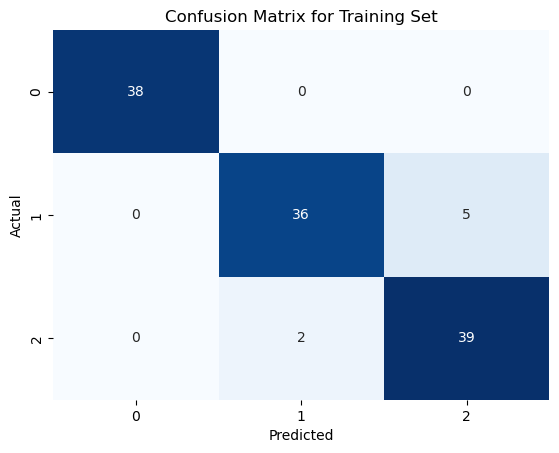

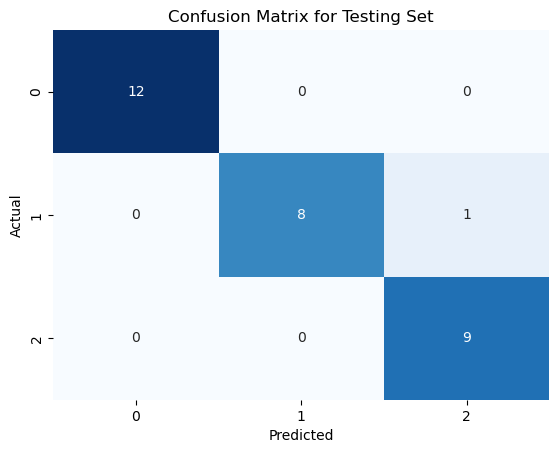

In [210]:

import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(conf_matrix, title):
    plt.figure()
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


plot_confusion_matrix(lr_train_confusion_matrix, "Confusion Matrix for Training Set")
plot_confusion_matrix(lr_y_test_confusion_matrix, "Confusion Matrix for Testing Set")

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [26]:
# Have fun here !